In [19]:

import pandas as pd

# Read the datasets into Pandas DataFrames
train = pd.read_csv('Titanic_train.csv')
test = pd.read_csv('Titanic_test.csv')
train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [21]:
#2.	Check for missing values

print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


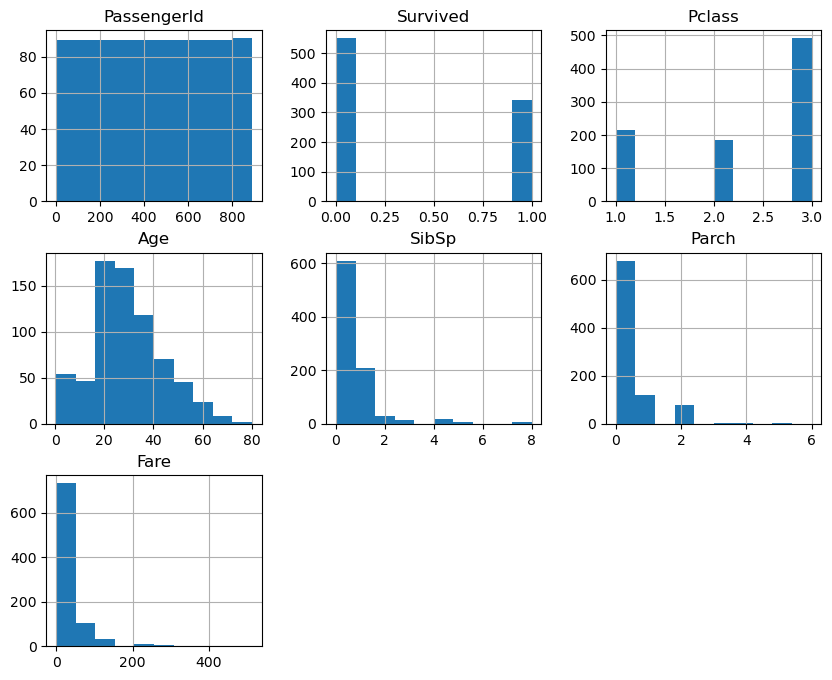

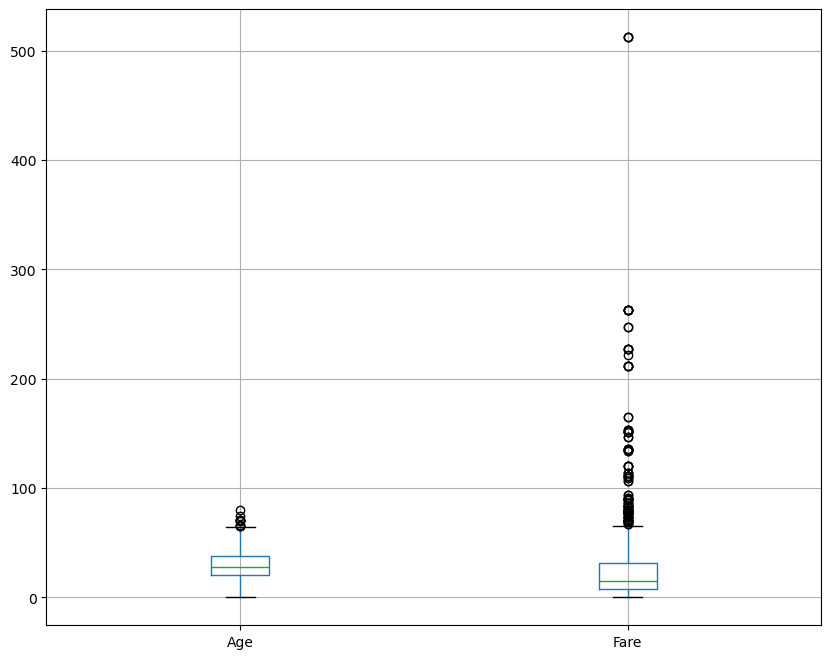

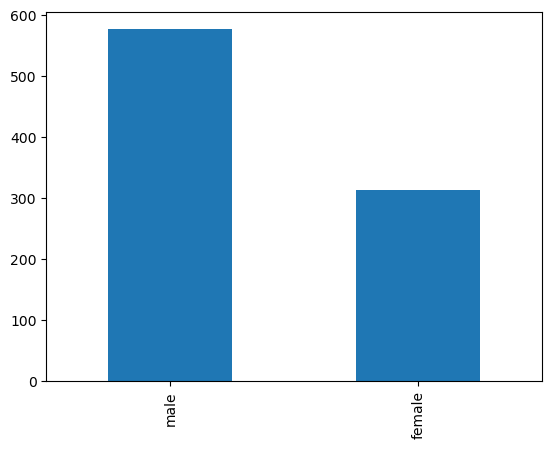

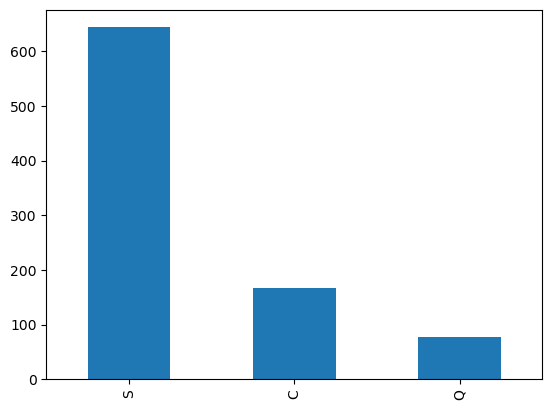

In [22]:
 #3.	Explore data distributions using histograms and box plots

import matplotlib.pyplot as plt

# Histograms for numerical variables
train.hist(bins=10, figsize=(10, 8))
plt.show()

# Box plots for numerical variables
train.boxplot(column=['Age', 'Fare'], figsize=(10, 8))
plt.show()

# Histograms for categorical variables
train['Sex'].value_counts().plot(kind='bar')
plt.show()

train['Embarked'].value_counts().plot(kind='bar')
plt.show()

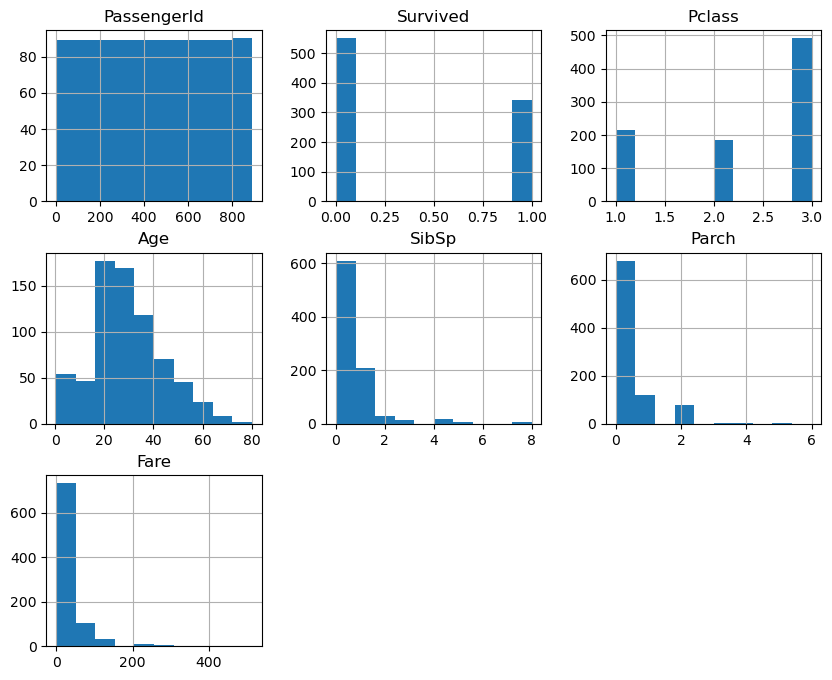

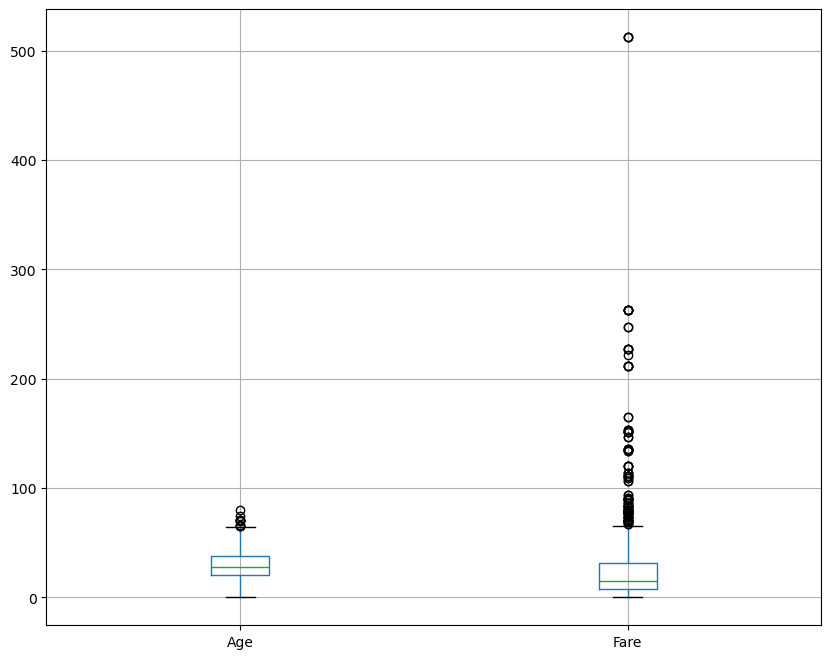

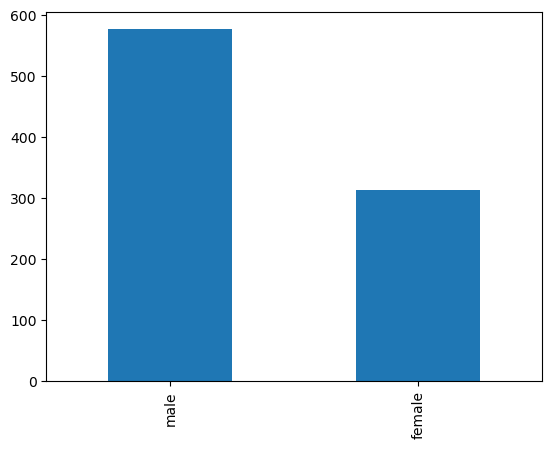

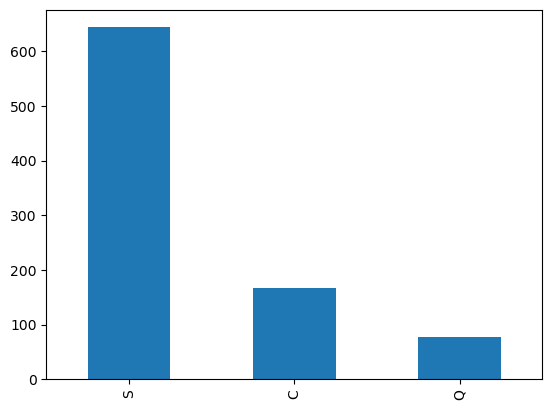

In [5]:
# 3.	Explore data distributions using histograms and box plots

import matplotlib.pyplot as plt

# Histograms for numerical variables
train.hist(bins=10, figsize=(10, 8))
plt.show()

# Box plots for numerical variables
train.boxplot(column=['Age', 'Fare'], figsize=(10, 8))
plt.show()

# Histograms for categorical variables
train['Sex'].value_counts().plot(kind='bar')
plt.show()

train['Embarked'].value_counts().plot(kind='bar')
plt.show()

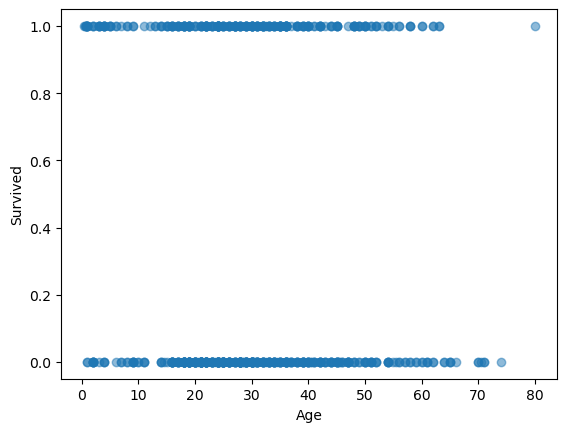

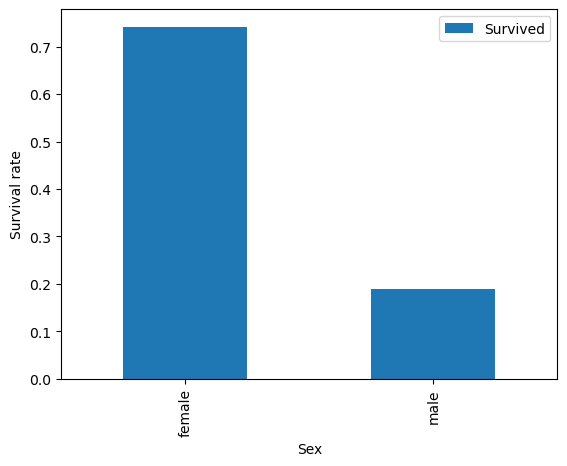

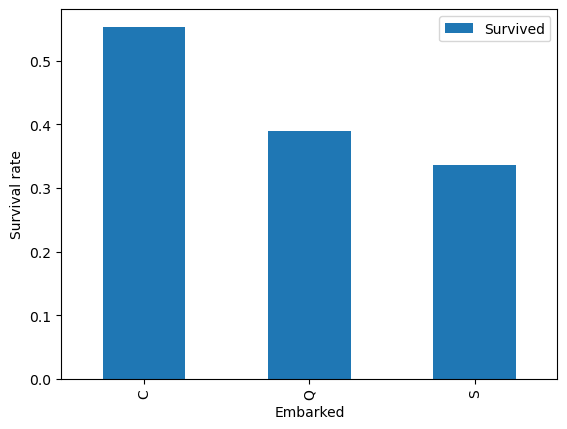

In [23]:
 #4.	Visualize relationships between features and survival using scatter plots and bar plots

# Scatter plot for Age vs. Survival
plt.scatter(train['Age'], train['Survived'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

# Bar plot for Sex vs. Survival
train[['Sex', 'Survived']].groupby('Sex').mean().plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival rate')
plt.show()

# Bar plot for Embarked vs. Survival
train[['Embarked', 'Survived']].groupby('Embarked').mean().plot(kind='bar')
plt.xlabel('Embarked')
plt.ylabel('Survival rate')
plt.show()

In [24]:
#1.	Impute missing values

# Impute missing values in Age with the median
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

# Impute missing values in Fare with the mean
train['Fare'].fillna(train['Fare'].mean(), inplace=True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

# Impute missing values in Embarked with the most frequent value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)


In [25]:

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for column in train.columns:
    train[column] = LE.fit_transform(train[column])

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,147,2


In [27]:
# 1.	Split the preprocessed dataset into training and testing sets.

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
#2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [29]:
# build  a model for train data

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


C:\Users\New\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [31]:
# appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7947761194029851
Precision: 0.7745098039215687
Recall: 0.7117117117117117
F1 Score: 0.7417840375586854


In [33]:
# 3.	Build predictive models using LightGBM and XGBoost algorithms.

# Import necessary libraries
import lightgbm as lgb
from xgboost import XGBClassifier

# LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)



[LightGBM] [Info] Number of positive: 231, number of negative: 392
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 849
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370787 -> initscore=-0.528844
[LightGBM] [Info] Start training from score -0.528844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [34]:
#Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy, precision, recall, and F1-score for both models
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print the results
print(f"\nLightGBM Model:")
print(f"Accuracy: {accuracy_lgb}")
print(f"Precision: {precision_lgb}")
print(f"Recall: {recall_lgb}")
print(f"F1-score: {f1_lgb}")

print(f"\nXGBoost Model:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-score: {f1_xgb}")



LightGBM Model:
Accuracy: 0.8208955223880597
Precision: 0.8461538461538461
Recall: 0.6936936936936937
F1-score: 0.7623762376237624

XGBoost Model:
Accuracy: 0.8208955223880597
Precision: 0.8461538461538461
Recall: 0.6936936936936937
F1-score: 0.7623762376237624


In [35]:
# 5.	Use techniques like cross-validation to optimize model performance

from sklearn.model_selection import cross_val_score

# Perform cross-validation for LightGBM model
lgb_scores = cross_val_score(lgb_model, X, y, cv=5)
print(f"\nLightGBM Cross-Validation Scores: {lgb_scores}")
print(f"Average LightGBM Cross-Validation Score: {lgb_scores.mean():.4f}")

# Perform cross-validation for XGBoost model
xgb_scores = cross_val_score(xgb_model, X, y, cv=5)
print(f"\nXGBoost Cross-Validation Scores: {xgb_scores}")
print(f"Average XGBoost Cross-Validation Score: {xgb_scores.mean():.4f}")

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [36]:
print(f"\nXGBoost Cross-Validation Scores: {xgb_scores}")
print(f"Average XGBoost Cross-Validation Score: {xgb_scores.mean():.4f}")


XGBoost Cross-Validation Scores: [0.63128492 0.80898876 0.85393258 0.84269663 0.88202247]
Average XGBoost Cross-Validation Score: 0.8038


In [37]:
print(f"\nLightGBM Cross-Validation Scores: {lgb_scores}")
print(f"Average LightGBM Cross-Validation Score: {lgb_scores.mean():.4f}")



LightGBM Cross-Validation Scores: [0.66480447 0.81460674 0.85955056 0.83707865 0.86516854]
Average LightGBM Cross-Validation Score: 0.8082


In [38]:
# 5.	Use techniques like hyperparameter tuning to optimize model performance

# Hyperparameter tuning for LightGBM model using GridSearchCV
from sklearn.model_selection import GridSearchCV

lgb_param_grid = {
    'num_leaves': [31, 100],
    'max_depth': [5, 8, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train, y_train)

print(f"\nBest parameters for LightGBM model: {lgb_grid_search.best_params_}")

# Hyperparameter tuning for XGBoost model using GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [5, 8, 10],
    'subsample': [0.5, 0.7]
}

xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

print(f"\nBest parameters for XGBoost model: {xgb_grid_search.best_params_}")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 184, number of negative: 314
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 702
[LightGBM] [Info] Number of data points in the train set: 498, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.369478 -> initscore=-0.534457
[LightGBM] [Info] Start training from score -0.534457
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [40]:
#	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models

# Compare the performance metrics of LightGBM and XGBoost models
model_metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_lgb, accuracy_xgb],
    'Precision': [precision_lgb, precision_xgb],
    'Recall': [recall_lgb, recall_xgb],
    'F1-score': [f1_lgb, f1_xgb]
}

pd.DataFrame(model_metrics)


,Model,Accuracy,Precision,Recall,F1-score
0,LightGBM,0.820896,0.846154,0.693694,0.762376
1,XGBoost,0.820896,0.846154,0.693694,0.762376


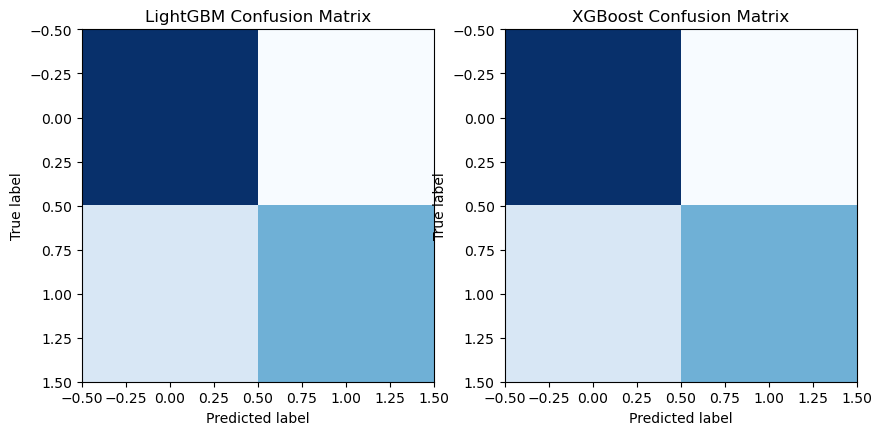

In [43]:
#1. Confusion matrices
from sklearn.metrics import confusion_matrix

# Create confusion matrices for both models
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cm_lgb, cmap='Blues')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.subplot(1, 2, 2)
plt.imshow(cm_xgb, cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

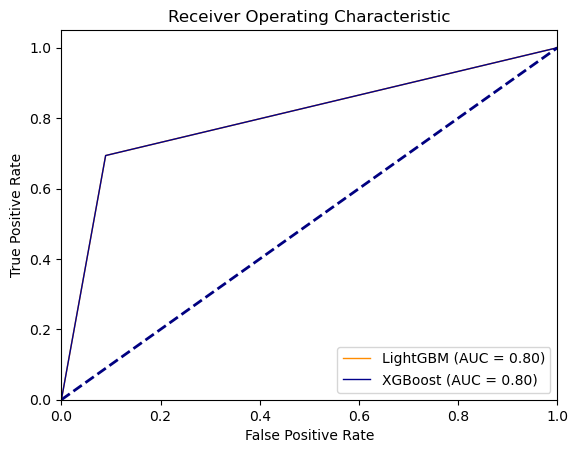

In [44]:
#2. ROC curves and AUC scores
from sklearn.metrics import roc_curve, auc

# Calculate ROC curves and AUC scores for both models
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_lgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_xgb)

roc_auc_lgb = auc(fpr_lgb, tpr_lgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot ROC curves
plt.figure()
plt.plot(fpr_lgb, tpr_lgb, color='darkorange', lw=1, label='LightGBM (AUC = %0.2f)' % roc_auc_lgb)
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=1, label='XGBoost (AUC = %0.2f)' % roc_auc_xgb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

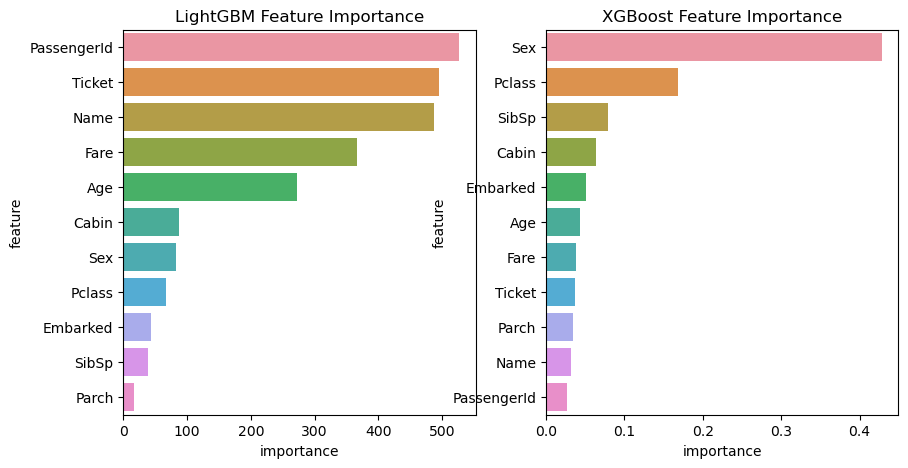

In [47]:
#3. Feature importance
# Calculate feature importance for both models
feature_importance_lgb = lgb_model.feature_importances_
feature_importance_xgb = xgb_model.feature_importances_

# Create dataframes for feature importance
feature_importance_df_lgb = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_lgb})
feature_importance_df_xgb = pd.DataFrame({'feature': X.columns, 'importance': feature_importance_xgb})

# Sort features by importance
feature_importance_df_lgb = feature_importance_df_lgb.sort_values(by='importance', ascending=False)
feature_importance_df_xgb = feature_importance_df_xgb.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
import seaborn as sns
plt.subplot(1, 2, 1)
sns.barplot(x='importance', y='feature', data=feature_importance_df_lgb)
plt.title('LightGBM Feature Importance')

plt.subplot(1, 2, 2)
sns.barplot(x='importance', y='feature', data=feature_importance_df_xgb)
plt.title('XGBoost Feature Importance')

plt.show()